In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/'
static = pd.read_csv(path+'flat.csv',index_col='patient')
dynamic = pd.read_csv(path+'timeseries.csv',index_col='patient')
labels = pd.read_csv(path+'labels.csv',index_col='patient')
notes_text = pd.read_csv(path+'tfidf.csv',index_col='patient')
static_test = pd.read_csv(path+'flat_test.csv',index_col='patient')
dynamic_test = pd.read_csv(path+'timeseries_test.csv',index_col='patient')
labels_test = pd.read_csv(path+'labels_test.csv',index_col='patient')
notes_text_test = pd.read_csv(path+'tfidf_test.csv',index_col='patient')

In [ ]:
dynamic

,time_slot,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc
patient,,,,,,,,,,,,,,,,,,,
25142109,1,0.913062,-1.981875,0.470452,-0.407207,0.914711,-0.508015,-0.495135,-0.001304,-0.676513,-0.028301,-0.014604,0.023509,0.033346,-0.001897,-0.117676,-0.019162,0.233605,0.242017
25142109,2,1.326549,-1.791017,0.085613,-0.749475,0.501881,-0.556630,1.530593,-0.001304,-0.807686,-0.509116,-0.605387,-0.481360,-0.477008,-0.204402,0.397776,-0.413856,-0.210479,4.363353
25142109,3,0.499576,-1.218442,0.047129,-0.635386,0.914711,-0.605244,0.447657,0.345614,-0.807686,-0.509116,-0.605387,-0.481360,-0.477008,-0.204402,0.397776,-0.413856,-0.210479,4.363353
25142109,4,0.292833,-1.600158,-0.029838,-0.407207,1.052322,-0.459401,-0.482394,-0.001304,-0.151822,-0.542099,-0.752268,-0.775698,-0.945441,-0.204402,0.101523,-0.441885,0.041817,2.714637
20792075,1,0.292833,0.308424,-0.876484,0.619597,-0.186170,0.123975,-0.087441,0.172155,-0.545340,1.288467,1.157176,-0.996452,-0.301346,-1.026264,-0.392230,1.660299,0.336163,-0.081806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23603308,2,-0.947626,0.499282,-0.337709,0.391418,-0.736611,-0.410786,-0.864607,-0.695140,0.635216,0.315464,0.324854,-0.003060,0.049979,-0.067425,1.331419,0.286872,-1.093515,-0.263984
23603308,3,-0.947626,0.499282,-0.337709,0.391418,-0.736611,-0.410786,-0.864607,-0.695140,0.635216,0.315464,0.324854,-0.003060,0.049979,-0.067425,1.331419,0.286872,-1.093515,-0.263984
27061818,1,-0.534140,1.835290,-0.761032,0.049150,-0.186170,-0.362171,-0.788164,0.865991,-0.807686,-0.278233,-0.360587,-0.076644,-0.418454,0.206529,-0.607686,-0.357798,0.041817,-0.846956


In [ ]:
static

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,race_unk_oth,first_careunit_CCU,first_careunit_CVICU,first_careunit_MICU,first_careunit_MICU_SICU,first_careunit_NEUROICU,first_careunit_SICU,first_careunit_TSICU,admission_type_elective,admission_type_emergency
patient,,,,,,,,,,,,,,,,,,,,,
25142109,0,-0.511174,0.036138,0.000000,-0.957595,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
20792075,1,-1.495155,-0.507705,0.328676,-1.986889,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
23912915,1,1.438029,-0.663089,0.328676,1.100993,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
20624617,0,0.388904,-1.242246,-1.335937,3.000000,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
24731504,0,-0.842700,0.470507,-0.873545,-0.957595,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25111133,1,1.358887,-0.119245,0.000000,0.757895,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
20422799,1,-0.475729,0.519947,1.253461,-0.957595,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
25590924,0,0.290939,-0.956199,-1.150980,2.130287,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
notes_text

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
patient,,,,,,,,,,,,,,,,,,,,,
25142109,0.233289,0.056032,0.048978,0.000000,0.0,0.063859,0.301363,0.020325,0.099283,0.000000,...,0.025617,0.0,0.013787,0.240606,0.044668,0.000000,0.110529,0.072126,0.060777,0.040873
20792075,0.212631,0.000000,0.000000,0.054009,0.0,0.058204,0.072283,0.000000,0.075410,0.000000,...,0.058371,0.0,0.000000,0.000000,0.000000,0.000000,0.107937,0.054783,0.000000,0.062090
23912915,0.295857,0.000000,0.000000,0.081981,0.0,0.000000,0.164579,0.105450,0.114465,0.000000,...,0.088601,0.0,0.000000,0.000000,0.000000,0.089240,0.109226,0.000000,0.000000,0.047123
20624617,0.341067,0.000000,0.000000,0.000000,0.0,0.000000,0.347835,0.089147,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.069254,0.000000,0.000000,0.119513
24731504,0.072143,0.000000,0.000000,0.000000,0.0,0.000000,0.220724,0.094283,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.073244,0.000000,0.000000,0.126398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25111133,0.046298,0.041700,0.000000,0.035280,0.0,0.000000,0.188868,0.121013,0.221666,0.000000,...,0.000000,0.0,0.000000,0.035813,0.000000,0.076808,0.141014,0.071570,0.000000,0.000000
20422799,0.353729,0.000000,0.000000,0.000000,0.0,0.000000,0.196771,0.042026,0.102641,0.000000,...,0.000000,0.0,0.000000,0.049749,0.000000,0.000000,0.228534,0.000000,0.000000,0.169022
25590924,0.202450,0.000000,0.023613,0.000000,0.0,0.000000,0.229408,0.058795,0.131632,0.023136,...,0.074101,0.0,0.019941,0.034800,0.000000,0.000000,0.079932,0.017387,0.000000,0.059117


In [ ]:
labels

,los_icu,icu_death
patient,,
25142109,3.78,0
20792075,4.96,0
23912915,11.44,0
20624617,15.26,1
24731504,1.68,0
...,...,...
25111133,2.88,0
20422799,8.58,1
25590924,5.29,1


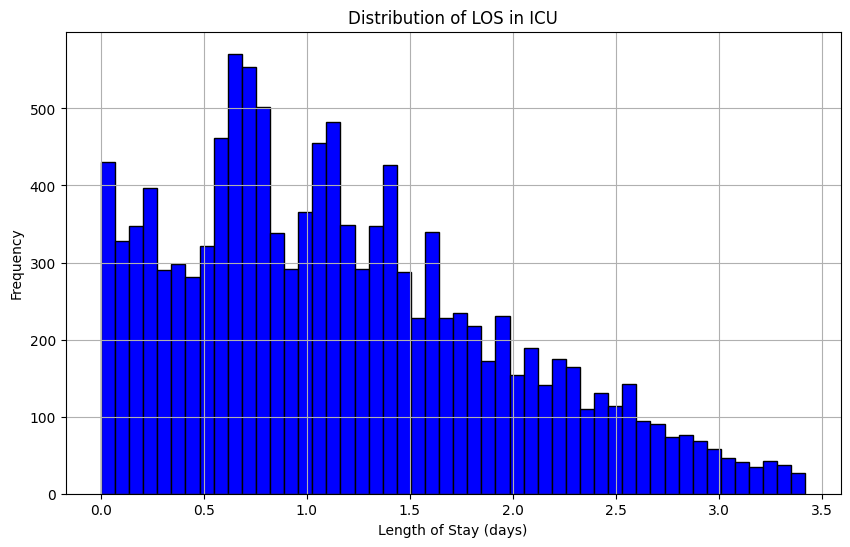

In [ ]:
labels['log_los_icu'] = np.log(labels['los_icu'] + 1e-6)
label_transformed = labels[['log_los_icu', 'icu_death']]

labels_test['log_los_icu'] = np.log(labels_test['los_icu'] + 1e-6)
label_test_transformed = labels_test[['log_los_icu', 'icu_death']]

plt.figure(figsize=(10, 6))
plt.hist(label_transformed['log_los_icu'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of LOS in ICU')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
label_transformed

,log_los_icu,icu_death
patient,,
25142109,1.329724,0
20792075,1.601406,0
23912915,2.437116,0
20624617,2.725235,1
24731504,0.518794,0
...,...,...
25111133,1.057791,0
20422799,2.149434,1
25590924,1.665818,1


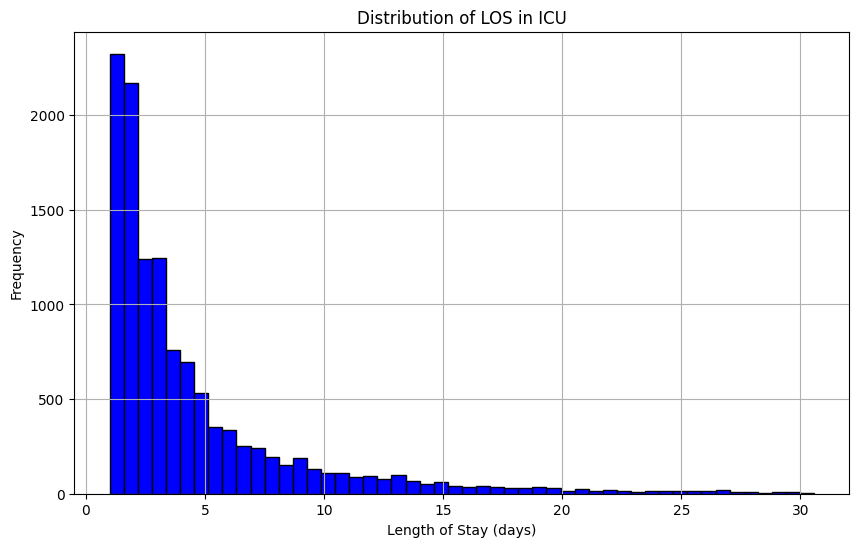

In [ ]:
# Plotting the histogram of the 'los_icu' column
plt.figure(figsize=(10, 6))
plt.hist(labels['los_icu'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of LOS in ICU')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# @title Dynamic data representation

# Reshape the dynamic data into consistent format by padding

def add_padding(df,time_col,groupby_col):
    df[time_col] = df[time_col].astype(int)

    def add_missing(group):
          complete_sequence = pd.Series(range(1, 5))
          group_cp = group.set_index(time_col).reindex(complete_sequence).reset_index().fillna(0)
          return group_cp

    resampled = df.groupby(groupby_col).apply(add_missing).reset_index(level=1).drop(columns='level_1')
    resampled.drop(columns='patient', inplace=True)
    resampled.rename(columns={'index': 'time_slot'}, inplace=True)

    return resampled

dyn_reset = dynamic.reset_index()
padded_dynamic = add_padding(dyn_reset,'time_slot','patient')
padded_dynamic # Now padded_dynamic is the updated dataframe for dynamic data

,time_slot,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc
patient,,,,,,,,,,,,,,,,,,,
20001305,1,-0.120654,0.117566,0.470452,3.585920,0.639491,-0.605244,0.039963,0.692532,-0.020649,0.010569,0.019966,0.004856,0.021439,-0.006427,0.059107,0.030855,0.144165,-0.157610
20001305,2,-0.534140,0.499282,0.508936,2.901384,0.501881,-0.556630,-0.023739,0.345614,0.504043,0.005910,0.014868,0.005020,0.023229,-0.007265,0.108619,0.021164,0.094051,-0.158146
20001305,3,-0.534140,0.499282,0.508936,2.901384,0.501881,-0.556630,-0.023739,0.345614,0.504043,0.005910,0.014868,0.005020,0.023229,-0.007265,0.108619,0.021164,0.094051,-0.158146
20001305,4,-0.534140,0.308424,0.585904,2.901384,0.639491,-0.556630,-0.253067,0.519073,-0.282995,-0.005319,0.006977,0.011655,0.034670,-0.009290,0.037785,0.012137,0.134085,-0.186103
20001361,1,-0.120654,-0.455009,-0.106806,-2.004458,0.639491,0.221204,-0.342250,-0.174763,1.815772,0.760737,0.961336,0.144109,0.752628,-0.341379,0.245161,0.819425,-1.093515,0.419186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999498,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29999625,1,0.292833,-0.264151,-0.799516,0.277329,0.089050,-0.410786,-0.533356,0.692532,0.372870,3.069559,3.017660,-0.628529,0.108533,-0.752310,0.505504,3.328032,-0.715071,0.173245
29999625,2,0.292833,-0.264151,-0.799516,0.277329,0.089050,-0.410786,-0.533356,0.692532,0.372870,3.069559,3.017660,-0.628529,0.108533,-0.752310,0.505504,3.328032,-0.715071,0.173245


In [ ]:
# Same thing for the test dataset
dyn_reset_test = dynamic_test.reset_index()
padded_dynamic_test = add_padding(dyn_reset_test,'time_slot','patient')
padded_dynamic_test

,time_slot,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,hemoglobin,mch,mchc,mcv,platelet,rbc,rdw,wbc
patient,,,,,,,,,,,,,,,,,,,
20003425,1,-0.534140,-0.264151,-0.453161,0.391418,-0.599000,-0.556630,-0.214845,-0.868599,0.897561,-1.119305,-1.290829,-0.775698,-1.003995,-0.204402,0.155387,-1.002468,-0.084331,-0.273093
20003425,2,-0.947626,-0.264151,-0.453161,0.277329,-0.323780,-0.605244,0.141886,-0.868599,0.897561,-1.135796,-1.290829,-0.702114,-0.945441,-0.204402,0.101523,-1.030497,-0.042281,-0.291311
20003425,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20003425,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20017154,1,0.499576,0.117566,-0.106806,0.505508,-1.011831,-0.216327,0.651503,-0.868599,-0.938859,0.727753,0.618615,0.328071,-0.301346,0.617460,-0.051091,0.398988,-0.673022,-0.528143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29987115,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29997616,1,0.706319,0.308424,-1.068903,0.733686,-0.186170,-0.653859,-0.648020,0.519073,-0.676513,1.783215,1.353016,-1.364375,-1.062549,-0.889287,0.936416,2.136794,-0.630972,0.200571
29997616,2,0.706319,0.308424,-1.068903,0.733686,-0.186170,-0.653859,-0.648020,0.519073,-0.676513,1.783215,1.353016,-1.364375,-1.062549,-0.889287,0.936416,2.136794,-0.630972,0.200571


In [ ]:
padded_dynamic = padded_dynamic.reset_index()
print(padded_dynamic.columns)


Index(['patient', 'time_slot', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc'],
      dtype='object')


In [ ]:
padded_dynamic_test = padded_dynamic_test.reset_index()
print(padded_dynamic_test.columns)

Index(['patient', 'time_slot', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc'],
      dtype='object')


In [ ]:
# Transform the padded_dynamic DataFrame into a 3D array suitable for input into a Conv1D layer

# Determine the number of time steps (assuming 'time_slot' goes from 1 to max time steps)
num_time_steps = padded_dynamic['time_slot'].max()

# Determine the number of features
feature_columns = [col for col in padded_dynamic.columns if col not in ['patient', 'time_slot']]
num_features = len(feature_columns)

# Get unique patient identifiers
patients = padded_dynamic['patient'].unique()
num_patients = len(patients)

# Initialize a 3D NumPy array for the transformed data
dynamic_numpy = np.zeros((num_patients, num_time_steps, num_features))

# Populate the array
for i, patient in enumerate(patients):

    patient_data = padded_dynamic[padded_dynamic['patient'] == patient]
    patient_data = patient_data.sort_values('time_slot')

    # Check if the patient's data needs to be further padded
    if patient_data.shape[0] < num_time_steps:
        # Initialize a padded array with zeros
        padded_patient_data = np.zeros((num_time_steps, num_features))

        # Place the patient's data into the padded array according to the time slots
        time_slots = patient_data['time_slot'] - 1  # time_slot starts at 1
        padded_patient_data[time_slots] = patient_data[feature_columns].values

        # Assign the padded patient data to the corresponding index in the 3D array
        dynamic_numpy[i] = padded_patient_data
    else:
        # If no padding is needed, just assign the values directly
        dynamic_numpy[i] = patient_data[feature_columns].values

# Now, `dynamic_numpy` is a 3D NumPy array with the shape (num_patients, num_time_steps, num_features)
print(num_patients, num_time_steps, num_features)

12077 4 18


In [ ]:
# Repeat for test dataset

# Determine the number of time steps (assuming 'time_slot' goes from 1 to max time steps)
num_time_steps_test = padded_dynamic_test['time_slot'].max()

# Determine the number of features
feature_columns_test = [col for col in padded_dynamic_test.columns if col not in ['patient', 'time_slot']]
num_features_test = len(feature_columns_test)

# Get unique patient identifiers
patients_test = padded_dynamic_test['patient'].unique()
num_patients_test = len(patients_test)

# Initialize a 3D NumPy array for the transformed data
dynamic_numpy_test = np.zeros((num_patients_test, num_time_steps_test, num_features_test))

# Populate the array
for i, patient in enumerate(patients_test):

    patient_data_test = padded_dynamic_test[padded_dynamic_test['patient'] == patient]
    patient_data_test = patient_data_test.sort_values('time_slot')

    # Check if the patient's data needs to be further padded
    if patient_data_test.shape[0] < num_time_steps_test:
        # Initialize a padded array with zeros
        padded_patient_data_test = np.zeros((num_time_steps_test, num_features_test))

        # Place the patient's data into the padded array according to the time slots
        time_slots_test = patient_data_test['time_slot'] - 1  # time_slot starts at 1
        padded_patient_data_test[time_slots_test] = patient_data_test[feature_columns_test].values

        # Assign the padded patient data to the corresponding index in the 3D array
        dynamic_numpy_test[i] = padded_patient_data_test
    else:
        # If no padding is needed, just assign the values directly
        dynamic_numpy_test[i] = patient_data_test[feature_columns_test].values

# Now, `dynamic_numpy_test` is a 3D NumPy array with the shape (num_patients, num_time_steps, num_features)
print(num_patients_test, num_time_steps_test, num_features_test)

2589 4 18


In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model

# Retrieve the number of time steps and features from the transformed array
num_patients, num_time_steps, num_features = dynamic_numpy.shape

# Define the input layer with the shape of the dynamic data
input_dynamic = Input(shape=(num_time_steps, num_features), name='dynamic_input')

# First convolutional layer with 32 filters and kernel size 3
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_dynamic)

# Second convolutional layer with doubled number of filters for hierarchical feature learning
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)

# Flatten the output
flattened_dynamic = Flatten()(conv2)

# Create the model
dynamic_feature_extractor = Model(inputs=input_dynamic, outputs=flattened_dynamic, name='dynamic_feature_extractor')
dynamic_feature_extractor.summary()


Model: "dynamic_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dynamic_input (InputLayer)  [(None, 4, 18)]           0         
                                                                 
 conv1d (Conv1D)             (None, 4, 32)             1760      
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 64)             6208      
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
Total params: 7968 (31.12 KB)
Trainable params: 7968 (31.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Static data representation
from tensorflow.keras.layers import Dense

# Convert the pandas DataFrame to a NumPy array & for the test dataset
static_numpy = static.to_numpy()
static_numpy_test = static_test.to_numpy()

# Define the input layer with the shape of the static data features
input_static = Input(shape=(31,), name='static_input')

# Create a dense layer to encode the static features
static_dense1 = Dense(units=16, activation='relu')(input_static)

# Create the model for static feature extraction
static_feature_extractor = Model(inputs=input_static, outputs=static_dense1, name='static_feature_extractor')
static_feature_extractor.summary()


Model: "static_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 static_input (InputLayer)   [(None, 31)]              0         
                                                                 
 dense (Dense)               (None, 16)                512       
                                                                 
Total params: 512 (2.00 KB)
Trainable params: 512 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# @title Notes data representation

# Convert the DataFrame to a NumPy
notes_numpy = notes_text.to_numpy()
notes_numpy_test = notes_text_test.to_numpy()

# Define the input layer for the notes representation
input_notes = Input(shape=(100,), name='notes_input')

# Add Dense layers to process the notes representation
notes_dense1 = Dense(units=50, activation='relu')(input_notes)

# Create the model for static feature extraction
notes_feature_extractor = Model(inputs=input_notes, outputs=notes_dense1, name='notes_feature_extractor')
notes_feature_extractor.summary()

Model: "notes_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 notes_input (InputLayer)    [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
Total params: 5050 (19.73 KB)
Trainable params: 5050 (19.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


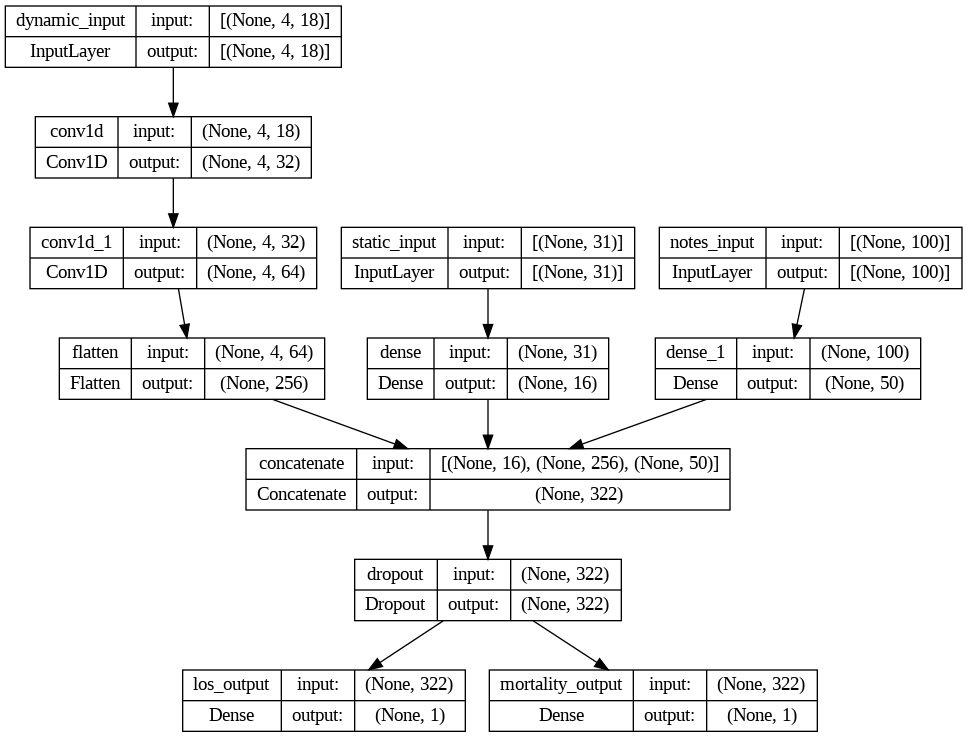

In [ ]:
# @title Concatenation & Output layer & Compilation

from tensorflow.keras.layers import concatenate, Dropout


# Concatenate three outputs into a single vector
combined_representation = concatenate([static_feature_extractor.output,
                      dynamic_feature_extractor.output,
                      notes_feature_extractor.output])

combined_representation = Dropout(0.2)(combined_representation) # 20% dropout rate

# Add TWO final dense layers for regression (los) & classification (mortality), respectively

los_output = Dense(units=1, activation='linear', name='los_output')(combined_representation)

mortality_output = Dense(units=1, activation='sigmoid', name='mortality_output')(combined_representation)

# Final model with two outputs
multitask_CNN = Model(inputs=[static_feature_extractor.input,
                dynamic_feature_extractor.input,
                notes_feature_extractor.input],
             outputs=[los_output, mortality_output],
                name='multitask_CNN')

!pip install pydot graphviz
from tensorflow.keras.utils import plot_model

plot_model(multitask_CNN, to_file='model.png', show_shapes=True, show_layer_names=True)

# Loss weights (LOS, mort) = (1, 0.5) -- Best model

In [ ]:
# @title Model Training

# Initialize the Adam optimizer with learning rate 0.001
from tensorflow.keras.optimizers import Adam

adam_optimizer = Adam(learning_rate=0.0005)

# Specify loss of two prediction tasks & trainning matrics
from tensorflow.keras.metrics import AUC

multitask_CNN.compile(
    optimizer=adam_optimizer,
    loss={'los_output': 'mean_squared_error',  # Regression loss for length of stay
        'mortality_output': 'binary_crossentropy'  # Binary classification loss for mortality
       },
    loss_weights={
        'los_output': 1.0,  # Weight for the regression loss
        'mortality_output': 0.5  # Weight for the classification loss
        },
    metrics={
        'los_output': ['mae'],  # Mean Absolute Error for regression
        'mortality_output': [AUC(name='auroc')]  # Classification auroc for mortality
       })

# Training the model

# Set the output
train_los = label_transformed['log_los_icu'].values
train_mortality = labels['icu_death'].values
test_los = label_test_transformed['log_los_icu'].values
test_mortality = labels_test['icu_death'].values

history = multitask_CNN.fit(
    x=[static_numpy, dynamic_numpy, notes_numpy],  # List of training input arrays
    y={
        'los_output': train_los,           # Training targets for length of stay
        'mortality_output': train_mortality  # Training targets for mortality
    },
    batch_size=64,
    epochs=50,
    validation_data=(
        [static_numpy_test, dynamic_numpy_test, notes_numpy_test],  # List of validation input arrays
        {
            'los_output': test_los,           # Validation targets for length of stay
            'mortality_output': test_mortality  # Validation targets for mortality
        }
    ))

Epoch 1/50
189/189 [==============================] - 3s 7ms/step - loss: 2.7472 - los_output_loss: 2.5907 - mortality_output_loss: 0.3130 - los_output_mae: 1.2328 - mortality_output_auroc: 0.7152 - val_loss: 1.4153 - val_los_output_loss: 1.2609 - val_mortality_output_loss: 0.3089 - val_los_output_mae: 0.8846 - val_mortality_output_auroc: 0.6967
Epoch 2/50
189/189 [==============================] - 1s 5ms/step - loss: 1.1124 - los_output_loss: 0.9526 - mortality_output_loss: 0.3196 - los_output_mae: 0.7675 - mortality_output_auroc: 0.6974 - val_loss: 0.9897 - val_los_output_loss: 0.8332 - val_mortality_output_loss: 0.3130 - val_los_output_mae: 0.7181 - val_mortality_output_auroc: 0.6827
Epoch 3/50
189/189 [==============================] - 1s 6ms/step - loss: 0.8396 - los_output_loss: 0.6773 - mortality_output_loss: 0.3245 - los_output_mae: 0.6532 - mortality_output_auroc: 0.6759 - val_loss: 0.8578 - val_los_output_loss: 0.6999 - val_mortality_output_loss: 0.3158 - val_los_output_mae: 

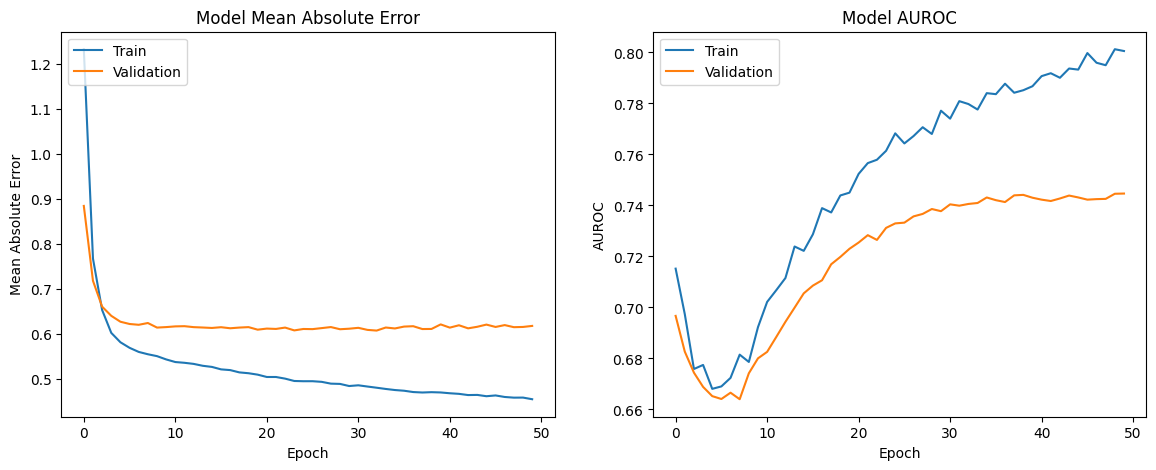

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation Mean Absolute Error values
plt.figure(figsize=(14, 5))

# Mean Absolute Error for training
plt.subplot(1, 2, 1)
plt.plot(history.history['los_output_mae'])
plt.plot(history.history['val_los_output_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# AUROC for training
plt.subplot(1, 2, 2)
plt.plot(history.history['mortality_output_auroc'])
plt.plot(history.history['val_mortality_output_auroc'])
plt.title('Model AUROC')
plt.ylabel('AUROC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from math import exp
from tensorflow.keras.metrics import MeanAbsoluteError


# Predict on the test dataset
predictions = multitask_CNN.predict([static_numpy_test, dynamic_numpy_test, notes_numpy_test])
log_los_predictions = predictions[0]
los_predictions_original_scale = np.exp(log_los_predictions) - 1e-6

original_validation_los = labels_test['los_icu'].values

mae_metric = MeanAbsoluteError()
mae_metric.update_state(y_true=original_validation_los, y_pred=los_predictions_original_scale)
mae = mae_metric.result().numpy()

print("Mean Absolute Error on original scale for LOS:", mae)

81/81 [==============================] - 0s 3ms/step
Mean Absolute Error on original scale for LOS: 2.7031968


In [ ]:
if los_predictions_original_scale.any() < 0:
    print("At least one element in los_predictions_original_scale is less than 0.")
else:
    print("No element in los_predictions_original_scale is less than 0.")

No element in los_predictions_original_scale is less than 0.


In [ ]:

# Predict on the training dataset
predictions = multitask_CNN.predict([static_numpy, dynamic_numpy, notes_numpy])
log_los_predictions = predictions[0]
los_predictions_original_scale = np.exp(log_los_predictions) - 1e-6

original_validation_los = labels['los_icu'].values

mae_metric = MeanAbsoluteError()
mae_metric.update_state(y_true=original_validation_los, y_pred=los_predictions_original_scale)
mae = mae_metric.result().numpy()

print("Mean Absolute Error on original scale for LOS:", mae)

378/378 [==============================] - 1s 2ms/step
Mean Absolute Error on original scale for LOS: 1.9485786


# Loss weights (LOS, mort) = (1,1)

In [ ]:
combined_representation_1 = concatenate([
                      dynamic_feature_extractor.output,
                      notes_feature_extractor.output])

# Add TWO final dense layers for regression (los) & classification (mortality), respectively

los_output = Dense(units=1, activation='linear', name='los_output')(combined_representation_1)

mortality_output = Dense(units=1, activation='sigmoid', name='mortality_output')(combined_representation_1)

multitask_CNN_1 = Model(inputs=[dynamic_feature_extractor.input,
                notes_feature_extractor.input],
             outputs=[los_output, mortality_output],
                name='multitask_CNN_1')

In [ ]:
adam_optimizer_1 = Adam(learning_rate=0.0005)

multitask_CNN_1.compile(
    optimizer=adam_optimizer_1,
    loss={'los_output': 'mean_squared_error',  # Regression loss for length of stay
        'mortality_output': 'binary_crossentropy'  # Binary classification loss for mortality
       },
    metrics={
        'los_output': ['mae'],  # Mean Absolute Error for regression
        'mortality_output': [AUC(name='auroc')]  # Classification auroc for mortality
       })

# Training the model

# Set the output
train_los = labels_test['los_icu'].values
train_mortality = labels['icu_death'].values
test_los = labels_test['los_icu'].values
test_mortality = labels_test['icu_death'].values



history = multitask_CNN_1.fit(
    x=[dynamic_numpy, notes_numpy],  # List of training input arrays
    y={
        'los_output': train_los,           # Training targets for length of stay
        'mortality_output': train_mortality  # Training targets for mortality
    },
    batch_size=64,
    epochs=50,
    validation_data=(
        [dynamic_numpy_test, notes_numpy_test],  # List of validation input arrays
        {
            'los_output': test_los,           # Validation targets for length of stay
            'mortality_output': test_mortality  # Validation targets for mortality
        }
    ))

Epoch 1/50
189/189 [==============================] - 4s 12ms/step - loss: 24.0756 - los_output_loss: 23.7032 - mortality_output_loss: 0.3724 - los_output_mae: 3.1962 - mortality_output_auroc: 0.4873 - val_loss: 21.4691 - val_los_output_loss: 21.1294 - val_mortality_output_loss: 0.3397 - val_los_output_mae: 3.0667 - val_mortality_output_auroc: 0.5147
Epoch 2/50
189/189 [==============================] - 2s 10ms/step - loss: 20.9213 - los_output_loss: 20.5709 - mortality_output_loss: 0.3504 - los_output_mae: 3.0181 - mortality_output_auroc: 0.5230 - val_loss: 20.9146 - val_los_output_loss: 20.5803 - val_mortality_output_loss: 0.3343 - val_los_output_mae: 2.9971 - val_mortality_output_auroc: 0.5456
Epoch 3/50
189/189 [==============================] - 1s 8ms/step - loss: 20.0625 - los_output_loss: 19.7187 - mortality_output_loss: 0.3439 - los_output_mae: 2.9607 - mortality_output_auroc: 0.5644 - val_loss: 20.5429 - val_los_output_loss: 20.2122 - val_mortality_output_loss: 0.3307 - val_lo